* All data files are "tab delimited" as csv format (which usually is comma delimited) won't work for you as the data itself contains commas!
* Courses - is the list of courses available (past and current)
* Questions - is the actual list of questions and you would find the actual question in the "body" property. Moodle surrounds it with all kinds of html/json and you'll have to look for the "text" nodes within the "body" property to get the complete question. You could write a Python script to parse it out and join the text together based on your needs.
* Questions - "name" property is where you would find the ontology - especially for the questions belonging to the newer courses.
* QuestionAnswers is the different possible options to choose from as an answer for the question. The actual answer is in the "body" property. I'm not sure if you require the "feedback" property... which is the narrative of why the option is correct/incorrect etc. and dwells deep into how you arrive at the answer, etc.
* QuestionBanks is the list of Question Banks for a Course.
* QuestionBankQuestions is the list of questions that are part of a question bank where the questions are from the inventory of questions in "Questions" data set.
* CurveSettings is the different Curves and their configuration for a Course.
* StudentQuizzes is the data set that represents the different quizzes that are generated using the Spaced Learning algorithm and provided to different students. 
* StudentQuizzes - "mdl_user_id" represents the student. "status" 2 means, it's finished. "curve" specifies the Curve student is in when that quiz was generated for them.
* StudentQuizQuestions - is the actual question the student got in that quiz and the answers they responded with. 

In [1]:
from os import listdir
from os.path import isfile, join
import pandas as pd
courses = pd.read_csv('data/Courses.txt', sep='\t')
curve_settings = pd.read_csv('data/CurveSettings.txt', sep='\t')
question_answers = pd.read_csv('data/QuestionAnswers.txt', sep='\t')
question_bank_questions = pd.read_csv('data/QuestionBankQuestions.txt', sep='\t')
question_banks = pd.read_csv('data/QuestionBanks.txt', sep='\t')
questions = pd.read_csv('data/Questions.txt', sep='\t')
student_quiz_questions = pd.read_csv('data/StudentQuizQuestions.txt', sep='\t')
student_quizzes = pd.read_csv('data/StudentQuizzes.txt', sep='\t')

### Questions
* parent in question_answers
* answer in student_quiz_questions

In [22]:
print(student_quiz_questions['quiz_question_id'].unique())
print(student_quiz_questions['user_quiz_id'].unique().size)


[556 557 558 559 560 616 617 618 619 620 638 639 640 641 642 643 621 561
 653 654 655 656 657 664 665 666 667 668 562 644 563 622 669 645]
10698


In [28]:
question_bank_questions['question_id'].unique().size

302

In [33]:
question_bank_questions['quiz_id'].unique().size

29

In [3]:
student_quiz_questions['quiz_question_id'].value_counts()

620    3045
619    3044
618    3032
616    3012
617    3006
638    2930
641    2928
557    2920
639    2915
640    2906
559    2896
556    2887
642    2878
560    2847
558    2812
667    1215
664    1206
668    1184
665    1155
666    1141
621       7
643       6
657       3
653       3
562       3
654       3
655       3
656       3
561       2
563       2
644       2
669       2
645       1
622       1
Name: quiz_question_id, dtype: int64

In [4]:
question_answers['parent'].unique().size

337

In [5]:
student_quizzes

,id,quiz_id,mdl_user_id,status,created_at,updated_at,curve,scored_question_count,question_count,quiz_path,total_score,incorrect,correct,unattempted,attempted,time_remaining
0,315,43,45,2,2020-01-10 00:30:02,2020-01-10 00:30:38,1,5,5,Starter,20,4,1,0,5,0
1,316,43,43,2,2020-01-10 00:35:02,2020-01-10 00:35:45,1,5,5,Starter,60,2,3,0,5,0
2,317,43,42,2,2020-01-10 00:40:02,2020-01-10 00:44:55,1,5,5,Starter,0,5,0,0,5,0
3,318,43,11,2,2020-01-10 03:33:43,2020-01-10 16:00:06,3,5,5,Starter,0,0,0,5,0,0
4,320,44,11,2,2020-01-10 03:33:43,2020-01-10 16:00:06,3,5,5,Starter,0,0,0,5,0,0
5,324,43,45,2,2020-01-11 03:35:39,2020-01-11 16:00:02,2,4,4,Error,0,0,0,4,0,0
6,330,43,45,2,2020-01-11 04:00:03,2020-01-11 20:00:01,2,4,4,Error,0,0,0,4,0,0
7,336,43,45,2,2020-01-11 08:00:03,2020-01-12 00:00:02,2,4,4,Error,0,0,0,4,0,0
8,342,43,45,2,2020-01-11 12:00:03,2020-01-12 00:00:03,2,4,4,Error,0,0,0,4,0,0
9,349,46,11,2,2020-01-11 20:00:03,2020-01-12 10:45:01,2,5,5,Starter,0,0,0,5,0,0


In [6]:
student_quiz_questions['quiz_question_id'].unique()

array([556, 557, 558, 559, 560, 616, 617, 618, 619, 620, 638, 639, 640,
       641, 642, 643, 621, 561, 653, 654, 655, 656, 657, 664, 665, 666,
       667, 668, 562, 644, 563, 622, 669, 645], dtype=int64)

In [7]:
data = pd.merge(student_quiz_questions[student_quiz_questions['answer']!='---AUTOSUBMITTED---']
         ,student_quizzes[['id','mdl_user_id']],
         how='left', left_on='user_quiz_id',right_on='id'
        )[['mdl_user_id','user_quiz_id','quiz_question_id','score']]

In [8]:
import seaborn as sns
sns.distplot(data['quiz_question_id'])

In [9]:
question = pd.concat([data.groupby('quiz_question_id').mean()['score'], data.groupby('quiz_question_id').count()['score']], axis = 1)
question.columns = ['average_score', 'count']

In [10]:
import matplotlib.pyplot as plt
data

,mdl_user_id,user_quiz_id,quiz_question_id,score
0,45,315,556,0
1,45,315,557,0
2,45,315,558,1
3,45,315,559,0
4,45,315,560,0
5,43,316,556,1
6,43,316,557,1
7,43,316,558,1
8,43,316,559,0
9,43,316,560,0


In [11]:
data.sort_values(['mdl_user_id','quiz_question_id','user_quiz_id'])

,mdl_user_id,user_quiz_id,quiz_question_id,score
25,11,365,556,0
45,11,670,556,0
139,11,1032,556,1
180,11,1395,556,1
26,11,365,557,0
46,11,670,557,1
181,11,1395,557,0
206,11,1456,557,1
261,11,1880,557,0
27,11,365,558,0


In [12]:
question

,average_score,count
quiz_question_id,,
556,0.632653,49
557,0.574468,47
558,0.684211,38
559,0.617021,47
560,0.702128,47
561,0.000000,2
562,1.000000,1
616,0.588235,34
617,0.787879,33


(0, 1)

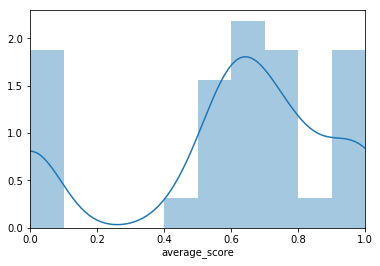

In [13]:
lm = sns.distplot(question['average_score'],bins=10)
lm.set_xlim(0,1)



(0, 0.018038285340314136)

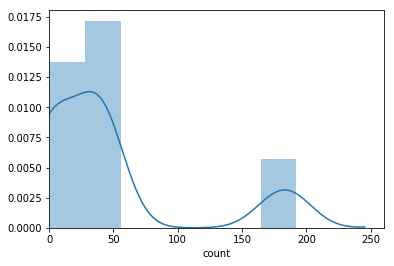

In [14]:
lm = sns.distplot(question['count'])
lm.set_xlim(0,)
lm.set_ylim(0,)


In [15]:
student = pd.concat([data.groupby('mdl_user_id').mean()['score'], data.groupby('mdl_user_id').count()['score']], axis = 1)

In [16]:
student

,score,score
mdl_user_id,,
11,0.555556,81
42,0.130435,23
43,0.250000,12
45,0.333333,9
46,0.533333,15
50,0.600000,15
51,0.833333,42
54,0.566667,30
56,1.000000,5
